# Procedure

Goal: Evaluate the effect of synthetic data for downstream task (fraud detection). 

## **Input Data**: Raw, SDV, DataSyn

1. Raw data
2. SDV synthetic data
3. DataSynthesizer synthetic data

## **Fraud detection models**: 

1. Na ̈ıve Bayes (NB)
2. Support Vector Machine (SVM)
3. K-nearest neighbour (KNN)
4. Random Forest (RF)
5. Logistic Regression (LR)
6. Majority Voting

## Performance metric source (4 ways): 
- Metric 1: Accuracy
- Metric 2: ROC_AUC score
- Metric 3: Classification report
- Metric 4: Confusion matrix

##Understanding raw dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("creditcard_sampledata_2.csv")

# Explore the features available in the dataframe
# df.head()
#print(df.info())


# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index)) 


0    7000
1     300
Name: Class, dtype: int64
0    0.958904
1    0.041096
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


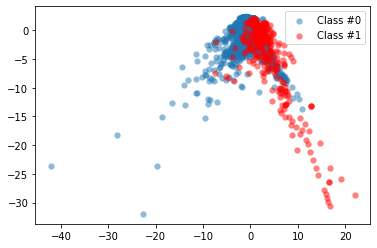

In [ ]:
# Define a function to turn dataframe to feature and response

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 1], X[y == 0, 0], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 1], X[y == 1, 0], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# Create X and y from our above defined function
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

##Random forest model for raw dataset



In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the random forest model from sklearn
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Random Forest:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Random Forest:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Random Forest:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Random Forest:\n",confusion_matrix(y_test, predicted))


Accuracy of Random Forest: 0.9917808219178083

The ROC curve of Random Forest: 0.961093456329283

Classification report of Random Forest:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.81      0.89        91

    accuracy                           0.99      2190
   macro avg       0.99      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Random Forest:
 [[2098    1]
 [  17   74]]


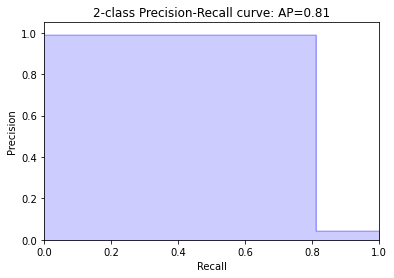

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Naive Bayes model for raw dataset



In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Naive Bayes model from sklearn
# Define the model as the Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to our training set
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Naive Bayes model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Naive Bayes:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Naive Bayes:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Naive Bayes:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Naive Bayes:\n",confusion_matrix(y_test, predicted))

Accuracy of Naive Bayes: 0.9671232876712329

The ROC curve of Naive Bayes: 0.9529708024229226

Classification report of Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2099
         1.0       0.57      0.81      0.67        91

    accuracy                           0.97      2190
   macro avg       0.78      0.89      0.83      2190
weighted avg       0.97      0.97      0.97      2190


Confusion matrix of Naive Bayes:
 [[2044   55]
 [  17   74]]


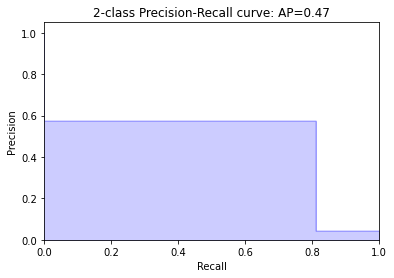

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

## Logistic Regression model for raw dataset

In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the LogisticRegression model from sklearn
# Define the model as the LogisticRegression
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()

# Fit the model to our training set
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our LogisticRegression model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Logistic Regression:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Logistic Regression:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Logistic Regression:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Logistic Regression:\n",confusion_matrix(y_test, predicted))

Accuracy of Logistic Regression: 0.9904109589041096

The ROC curve of Logistic Regression: 0.968781575737269

Classification report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.94      0.82      0.88        91

    accuracy                           0.99      2190
   macro avg       0.96      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Logistic Regression:
 [[2094    5]
 [  16   75]]


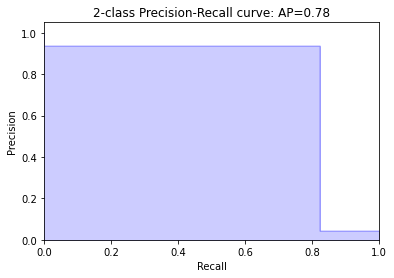

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

## K Nearest Neighbor model for raw dataset






In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the K Nearest Neighbor model from sklearn
# Define the model as the K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 20)

# Fit the model to our training set
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our K Nearest Neighbor
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of K Nearest Neighbor:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of K Nearest Neighbor:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of K Nearest Neighbor:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of K Nearest Neighbor:\n",confusion_matrix(y_test, predicted))

Accuracy of K Nearest Neighbor: 0.9904109589041096

The ROC curve of K Nearest Neighbor: 0.9465286976006365

Classification report of K Nearest Neighbor:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.78      0.87        91

    accuracy                           0.99      2190
   macro avg       0.99      0.89      0.93      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of K Nearest Neighbor:
 [[2098    1]
 [  20   71]]


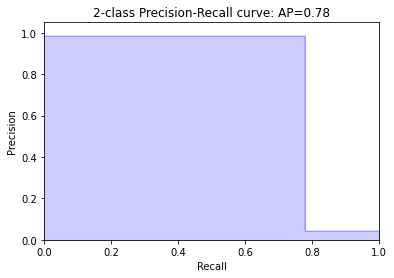

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Support Vector Machine model for raw dataset


In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Support Vector Machine model from sklearn
# Define the model as the Support Vector Machine
from sklearn.svm import SVC, LinearSVC
model = SVC(random_state=0)

# Fit the model to our training set
model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Support Vector Machine
predicted = model.predict(X_test)
# Predict probabilities
#probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print(accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print(roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print(classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print(confusion_matrix(y_test, predicted))

0.9899543378995433
0.9465286976006365
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2099
         1.0       0.99      0.77      0.86        91

    accuracy                           0.99      2190
   macro avg       0.99      0.88      0.93      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  21   70]]


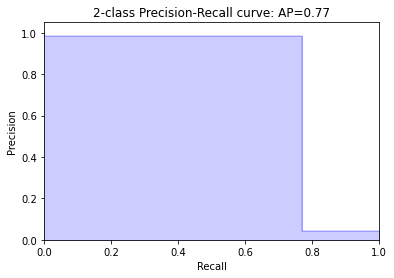

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

## Generating synthetic dataset by SDV

In [ ]:
#Implementation of SDV to Credit card dataset.
import numpy as np 
import pandas as pd 

#importing libraries
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE

#reading dataset
data= pd.read_csv("creditcard_sampledata_2.csv")

model_Gaussian = GaussianCopula()
model_TVAE = TVAE()

# fit the models
model_Gaussian.fit(data)
model_TVAE.fit(data)

# create synthetic data with each fitted model
new_data_model_Gaussian = model_Gaussian.sample(7300)
new_data_model_TVAE = model_TVAE.sample(7300)

new_data_model_Gaussian.head()
new_data_model_TVAE.head()

#saving synthetic datas
da = pd.DataFrame(new_data_model_Gaussian)
da.to_csv('model_Gaussian_for_creditcard.csv', index=False)
dd = pd.DataFrame(new_data_model_TVAE)
dd.to_csv('model_TVAE_for_creditcard.csv', index=False)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Value

##Generating synthetic dataset by DS correlated

================ Constructing Bayesian Network (BN) ================
Adding ROOT V28
Adding attribute V1
Adding attribute V27
Adding attribute V2
Adding attribute V4
Adding attribute V9
Adding attribute V10
Adding attribute V19
Adding attribute V16
Adding attribute V18
Adding attribute V26
Adding attribute V12
Adding attribute V14
Adding attribute V17
Adding attribute V3
Adding attribute V5
Adding attribute V13
Adding attribute V11
Adding attribute V15
Adding attribute V6
Adding attribute V24
Adding attribute V22
Adding attribute V21
Adding attribute V25
Adding attribute V7
Adding attribute V8
Adding attribute V20
Adding attribute V23
Adding attribute Class
Adding attribute Amount
========================== BN constructed ==========================
Constructed Bayesian network:
    V1     has parents ['V28'].
    V27    has parents ['V1', 'V28'].
    V2     has parents ['V27', 'V1'].
    V4     has parents ['V2', 'V1'].
    V9     has parents ['V4', 'V1'].
    V10    has parents ['V9',

/usr/local/lib/python3.7/dist-packages/DataSynthesizer/ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 5), dpi=120)
/usr/local/lib/python3.7/dist-packages/DataSynthesizer/ModelInspector.py:130: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 6), dpi=120)


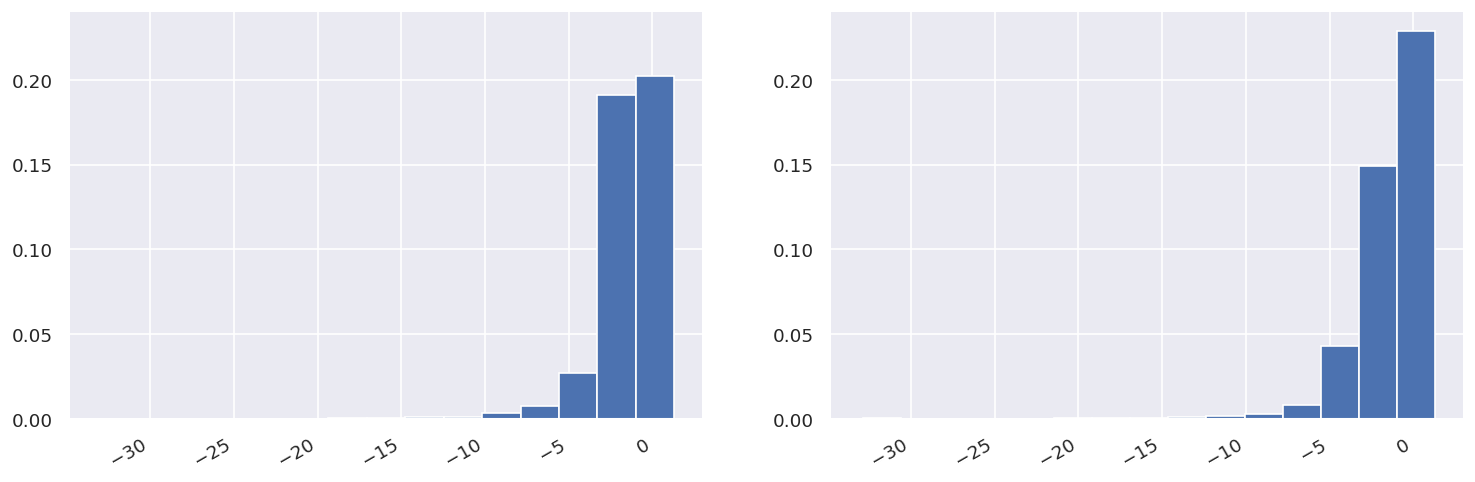

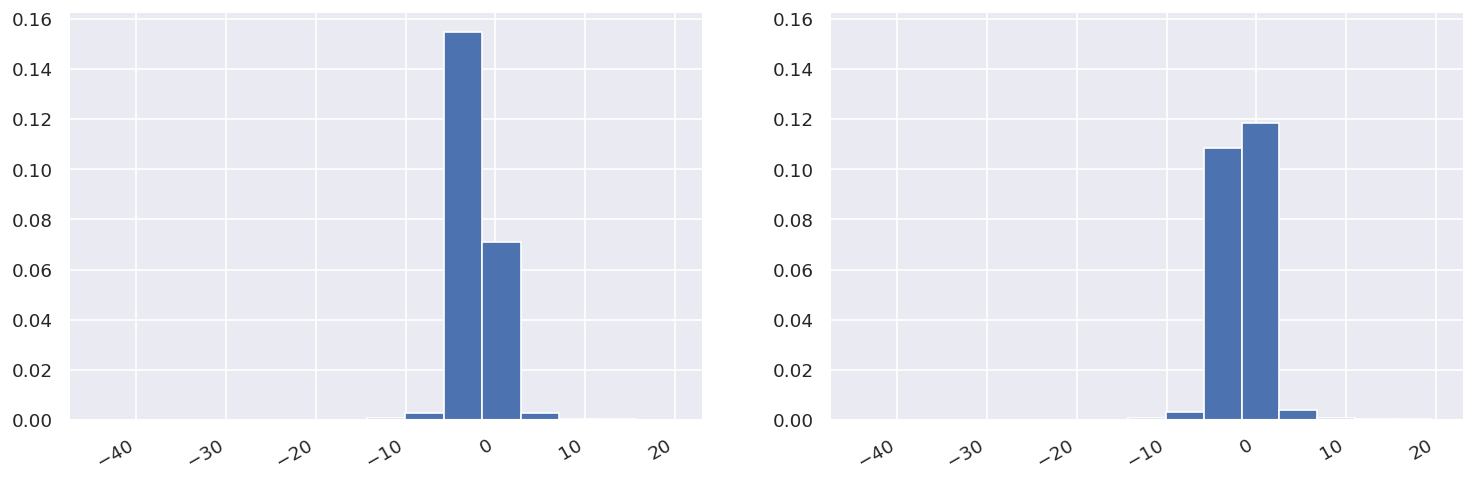

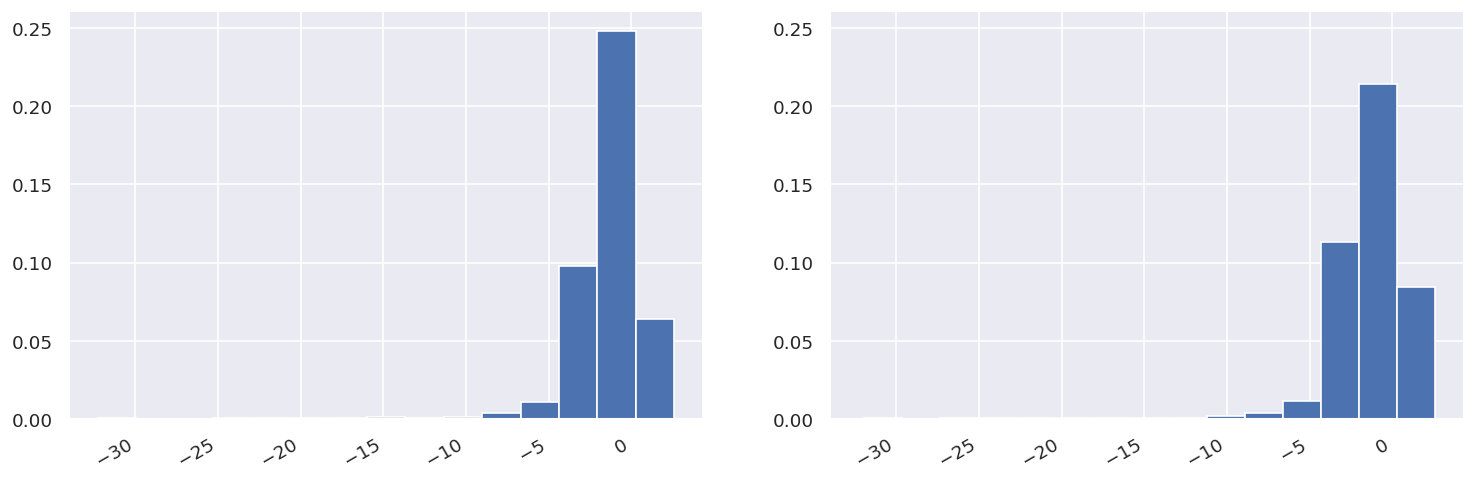

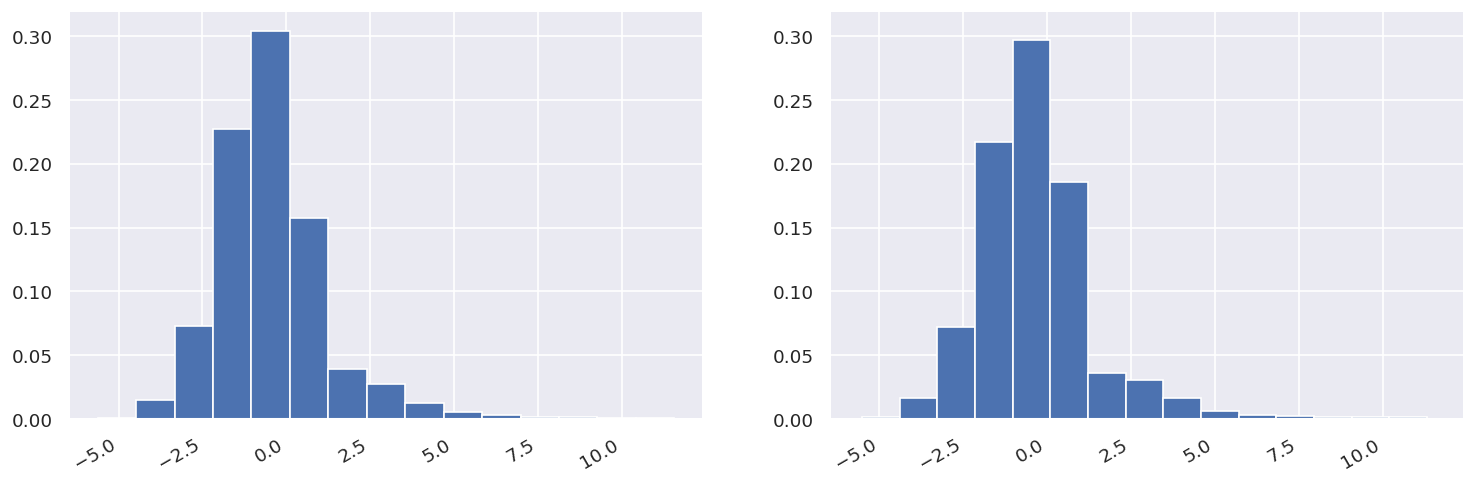

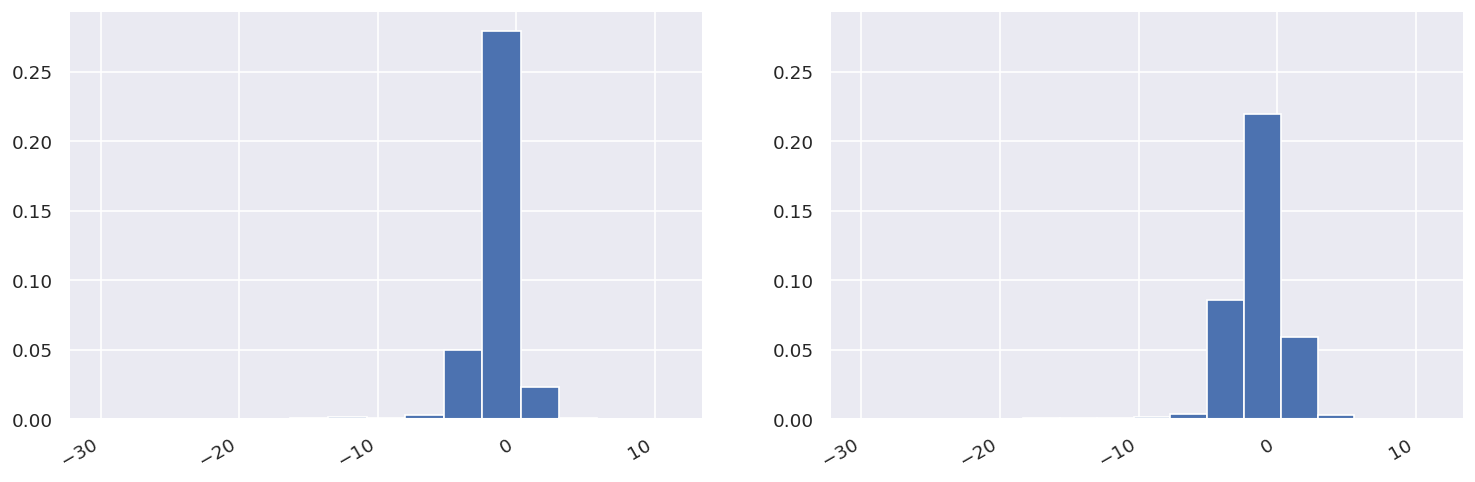

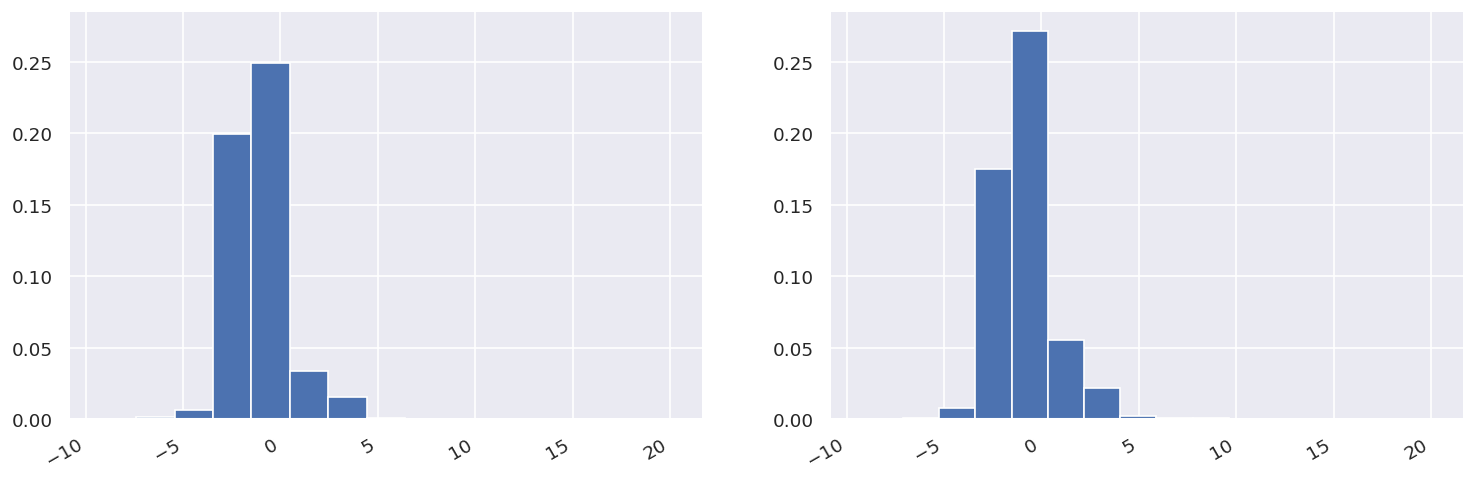

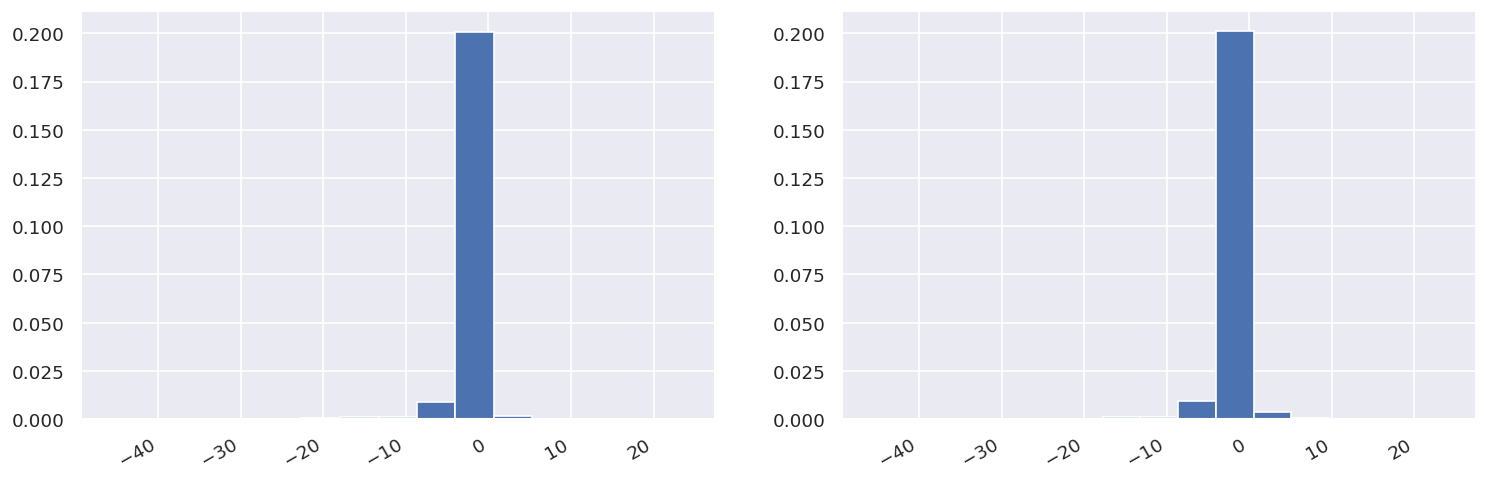

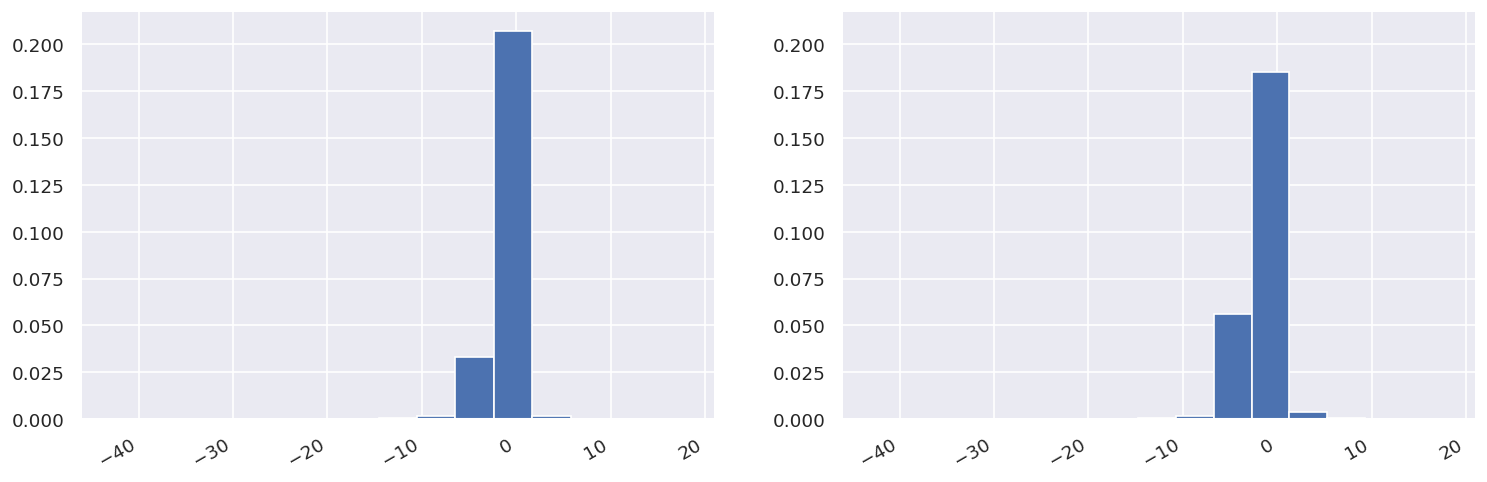

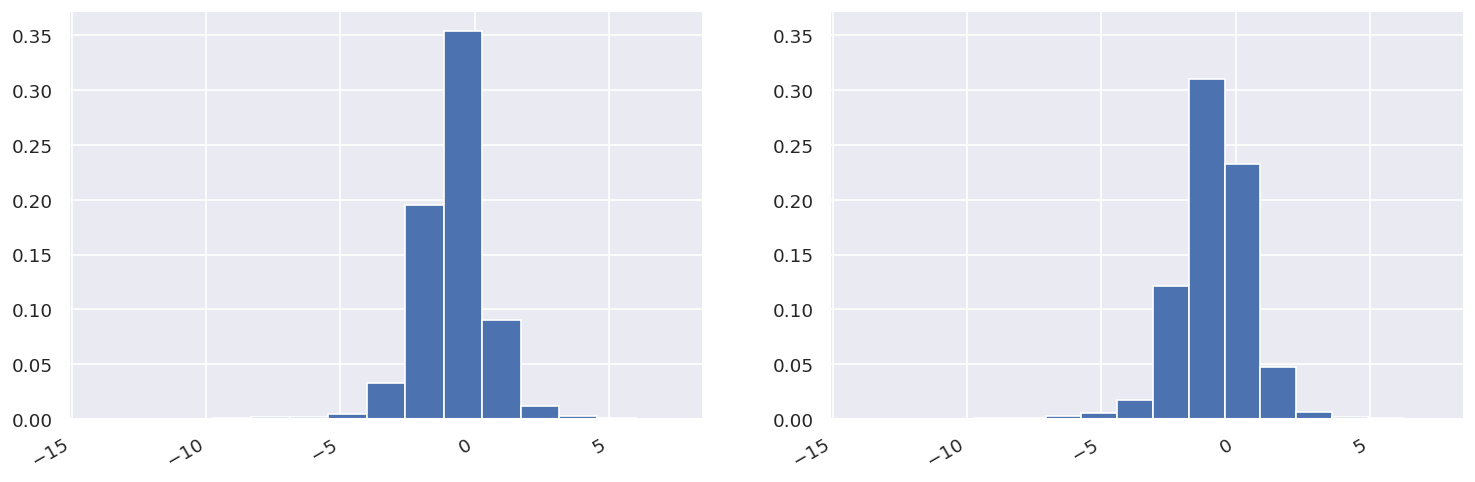

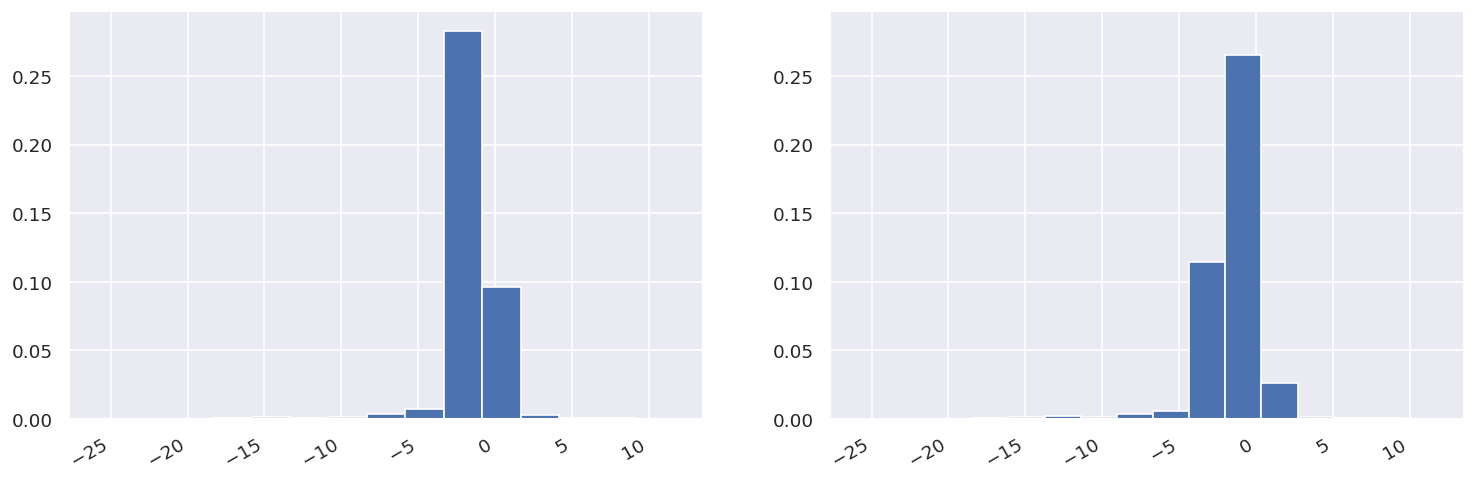

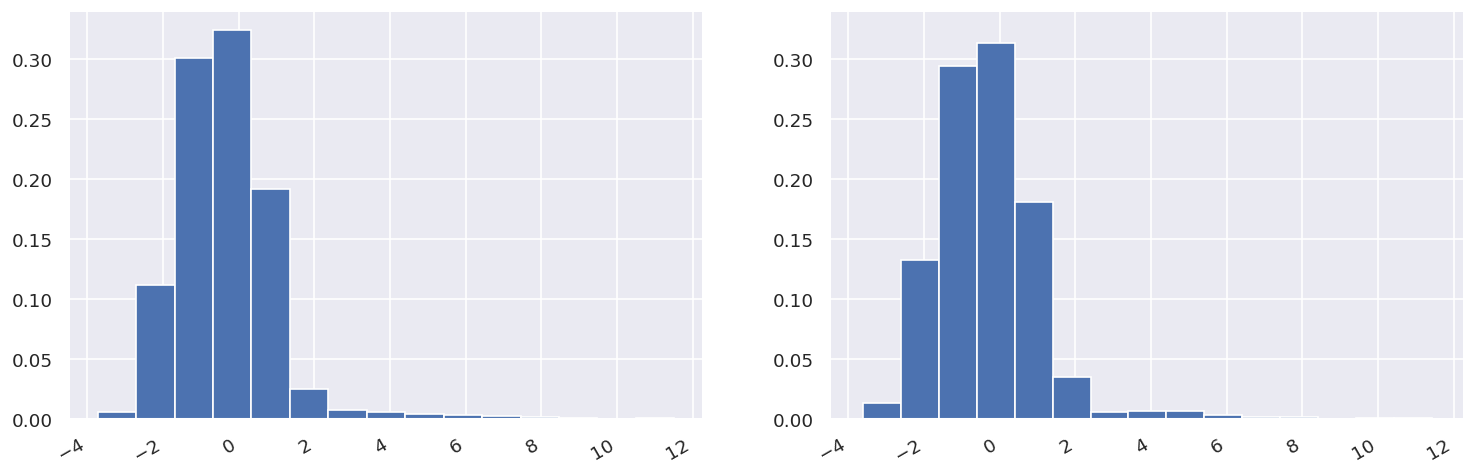

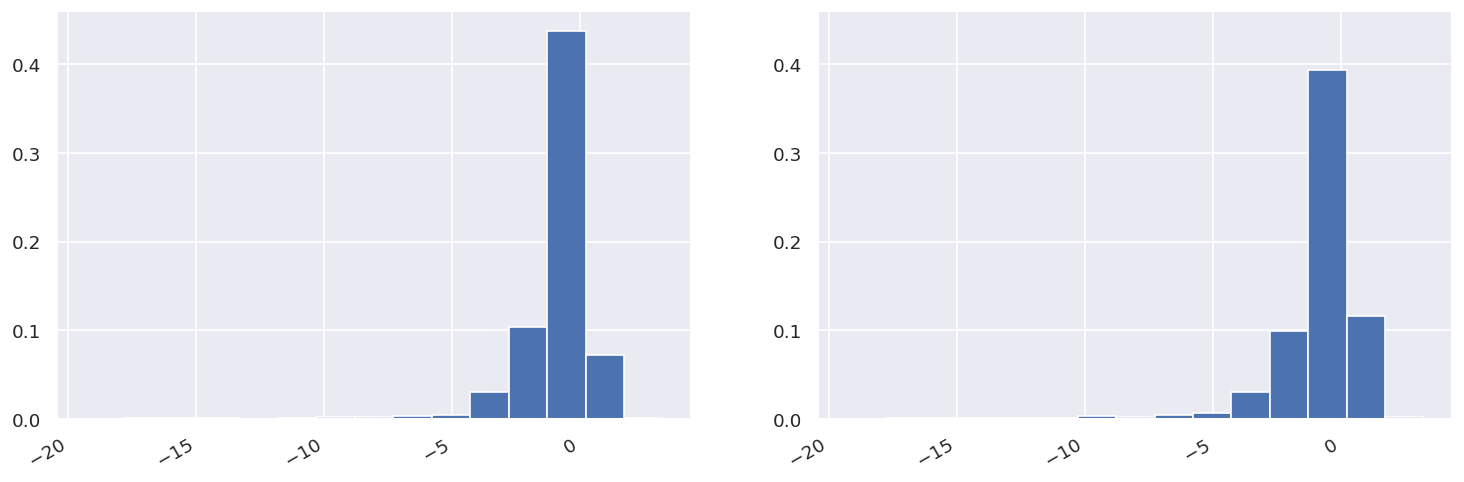

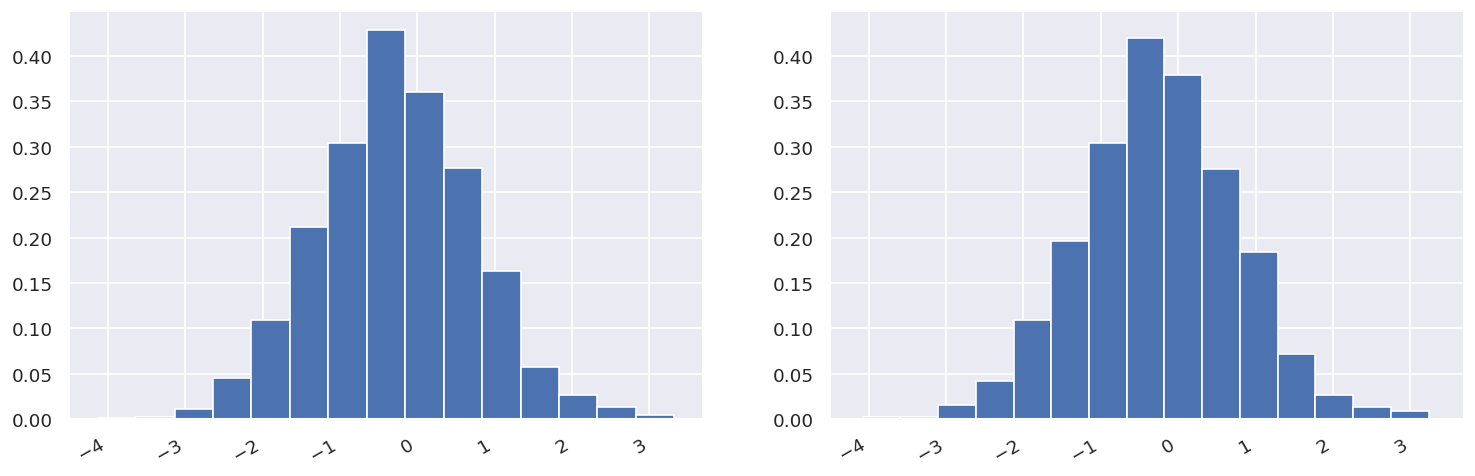

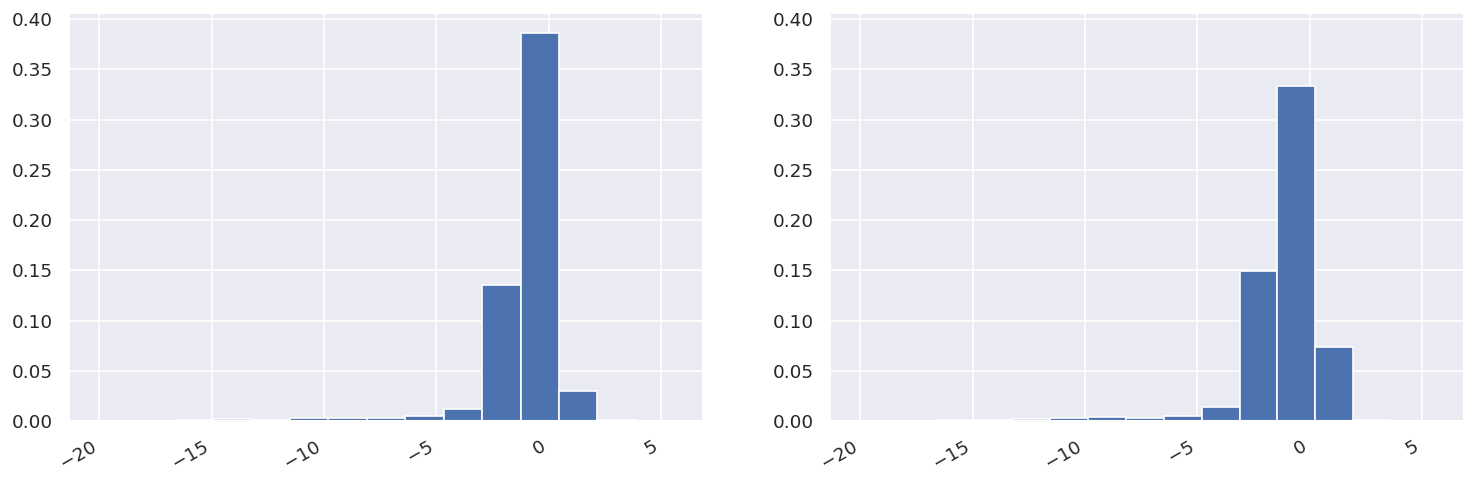

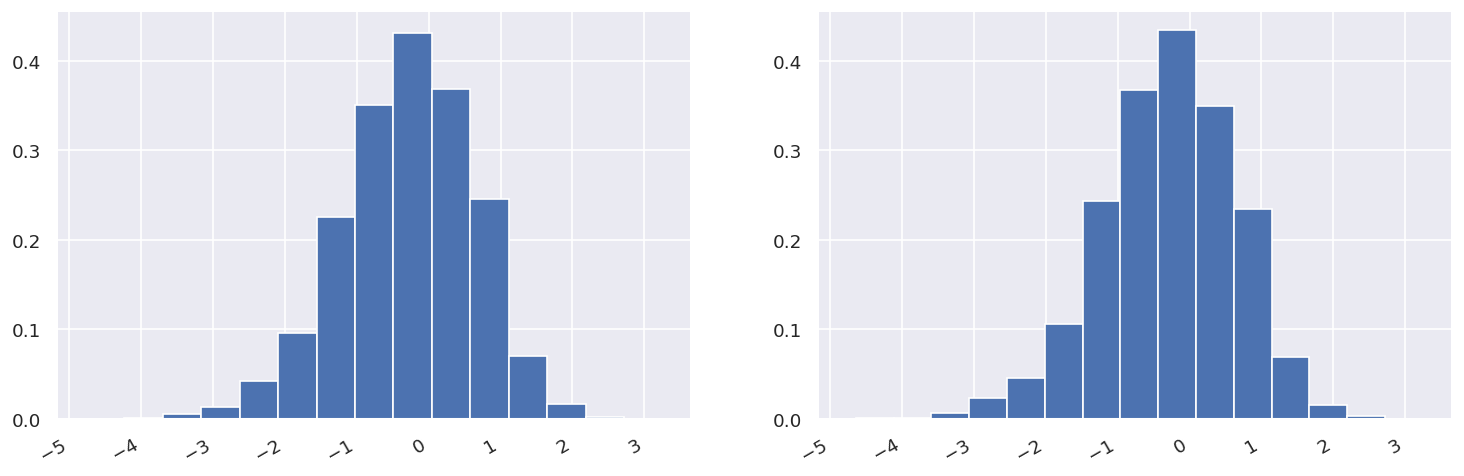

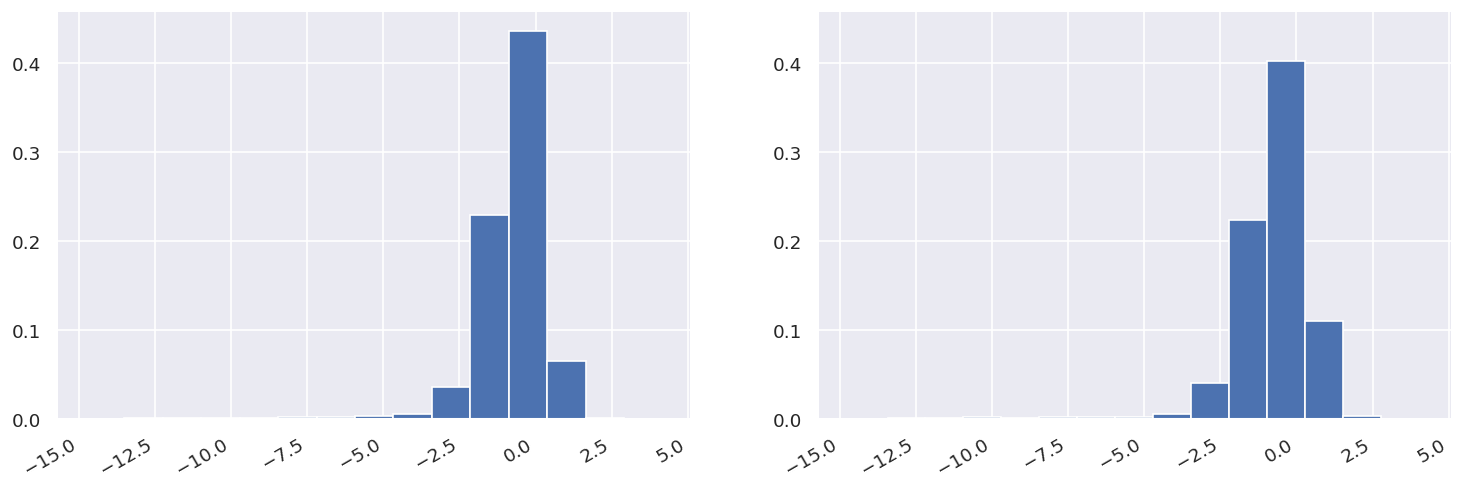

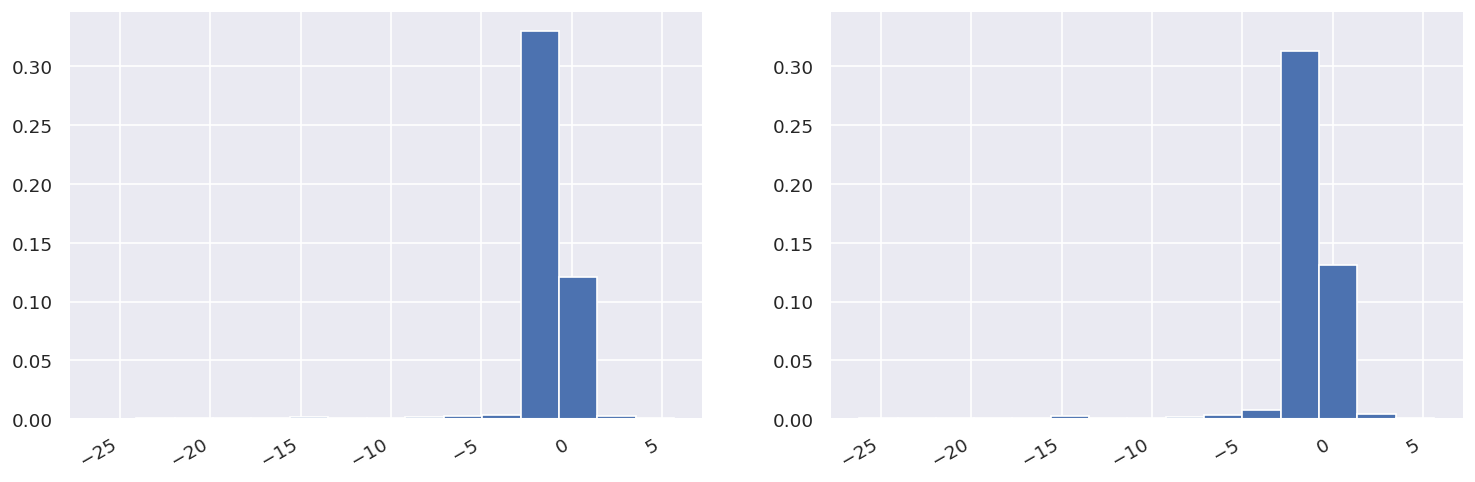

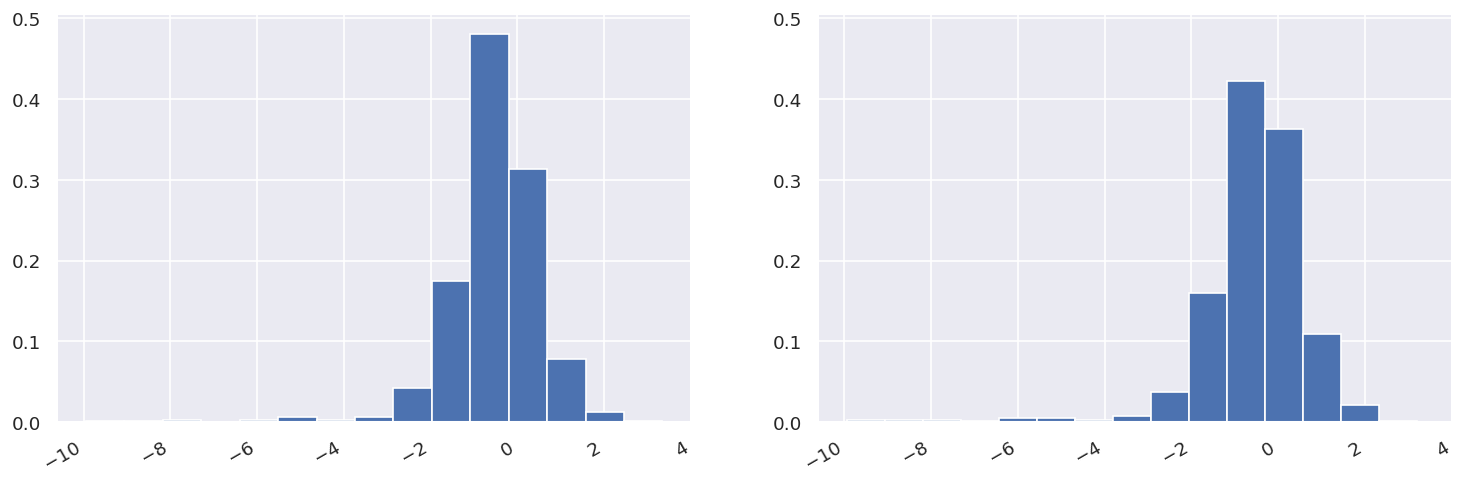

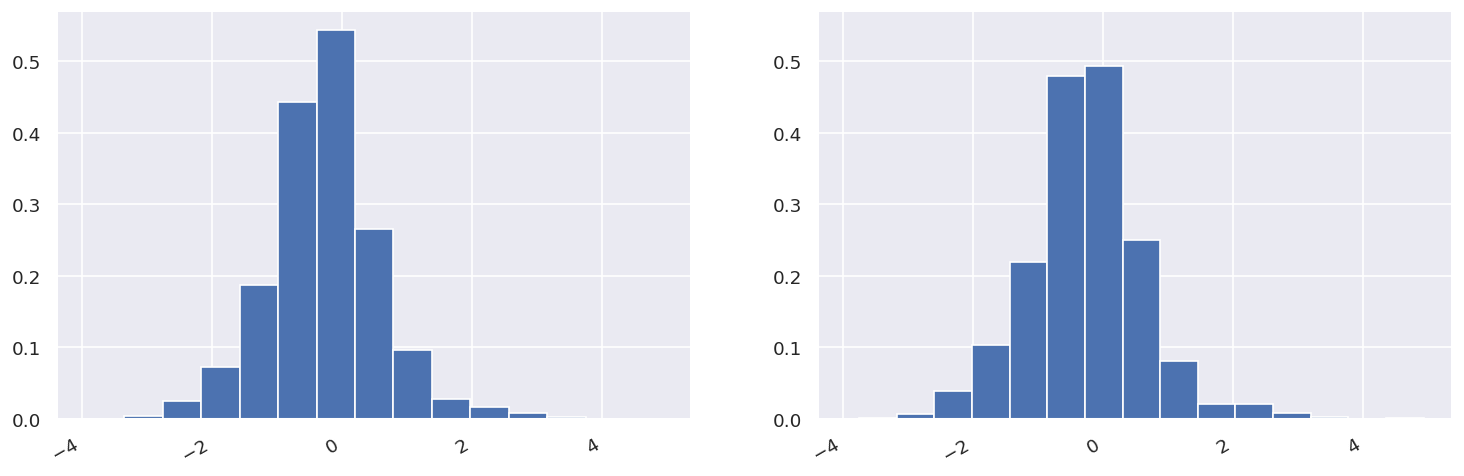

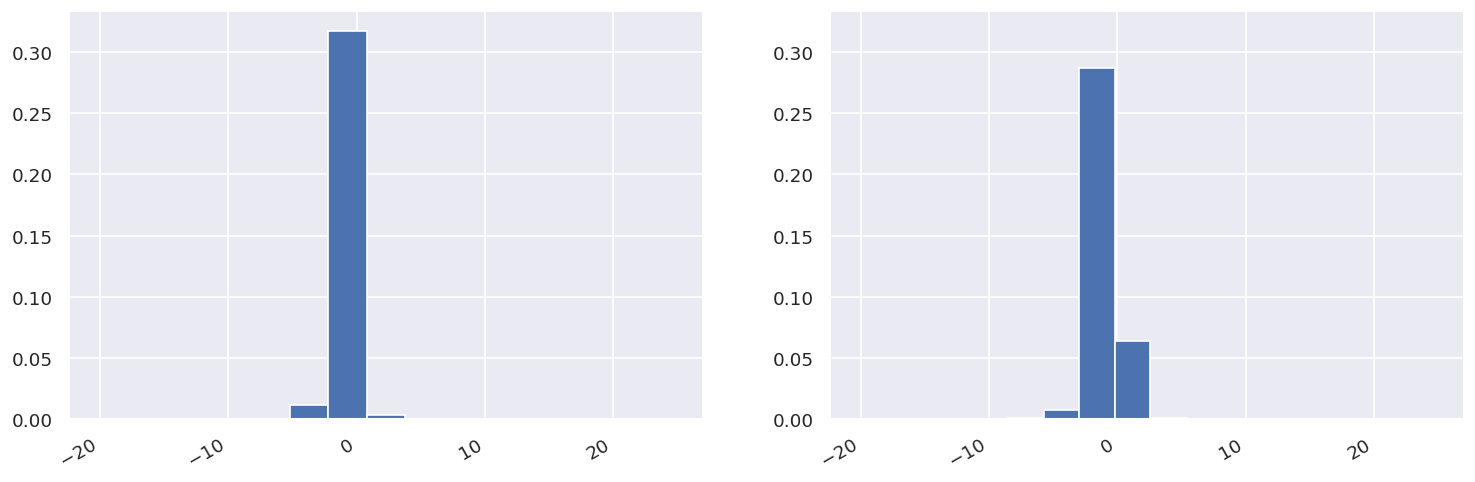

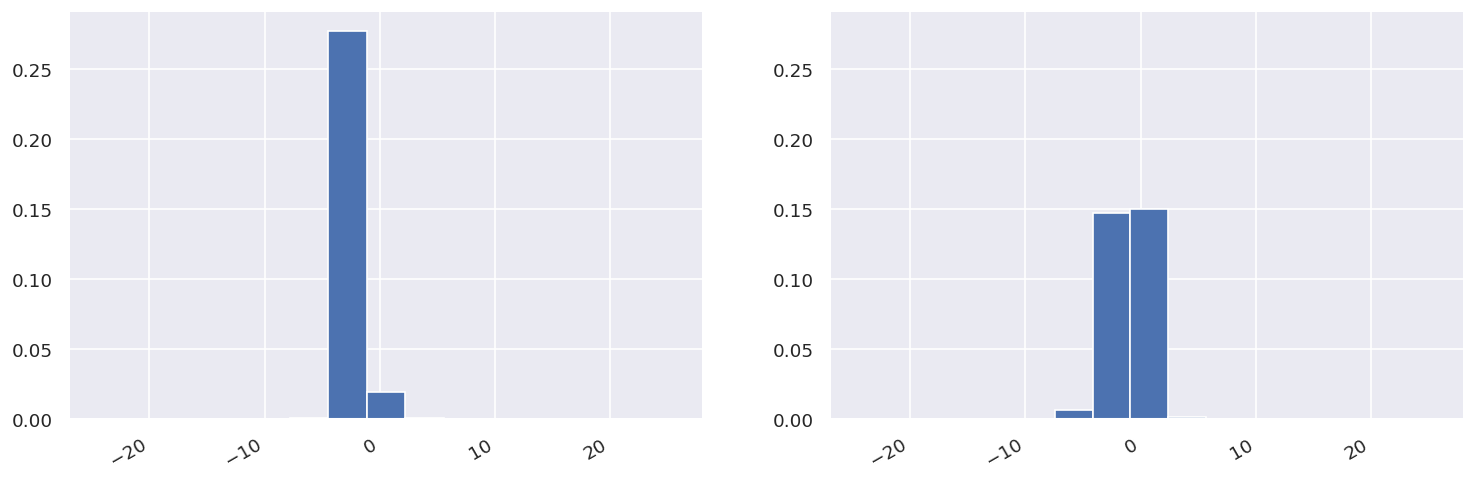

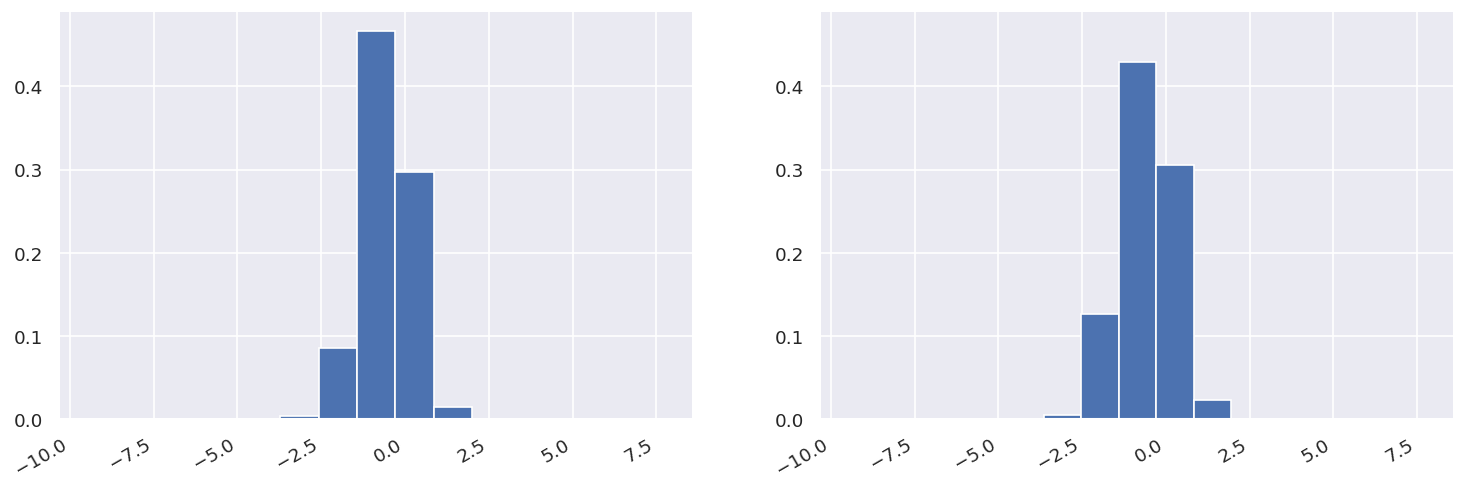

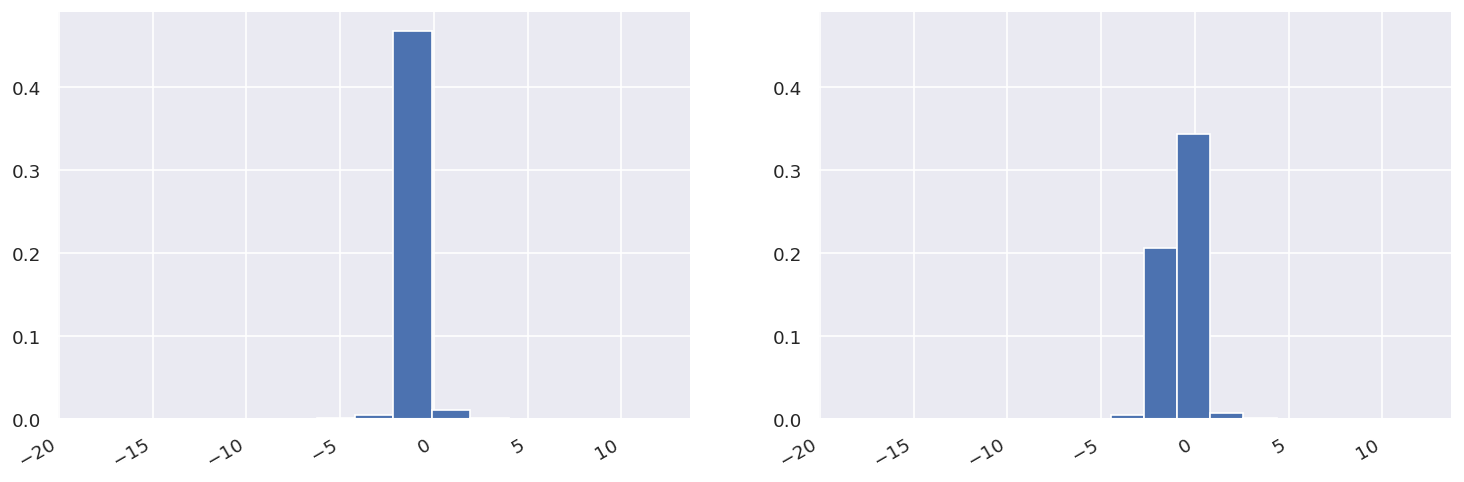

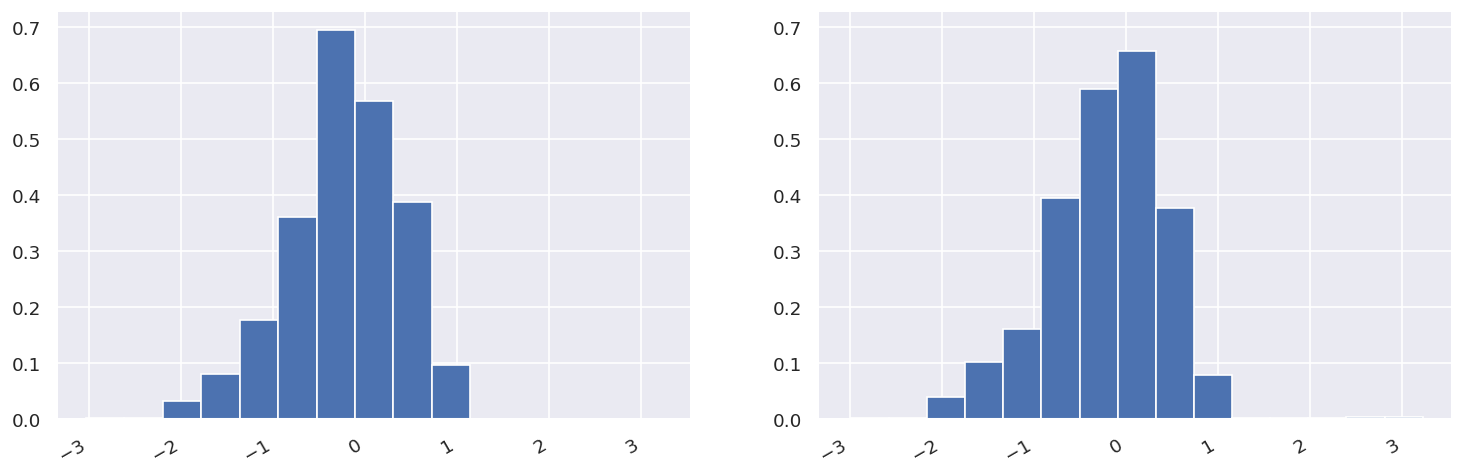

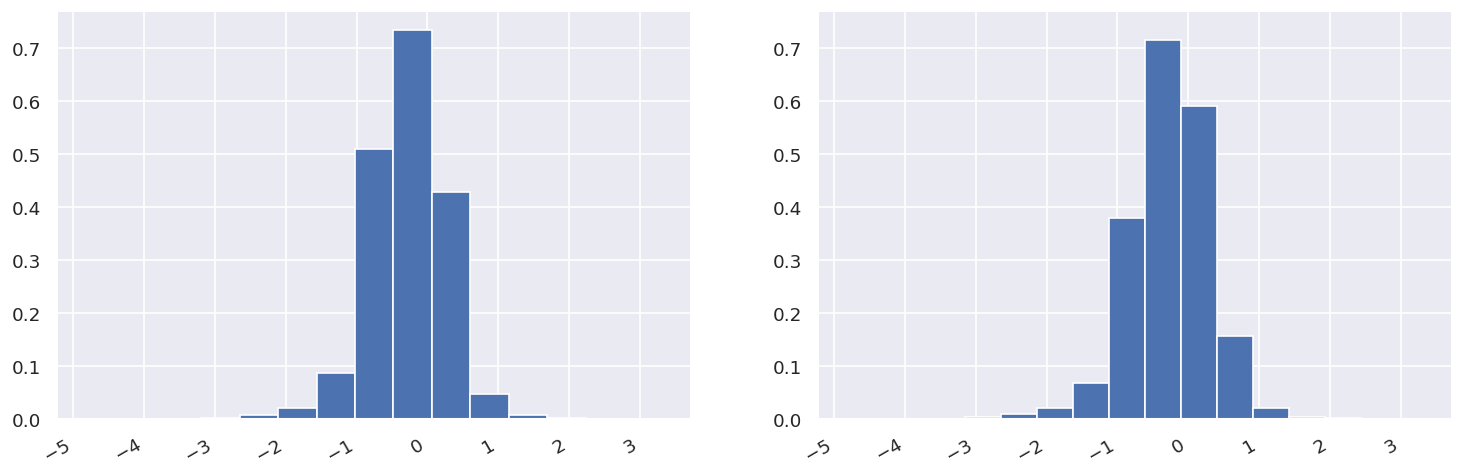

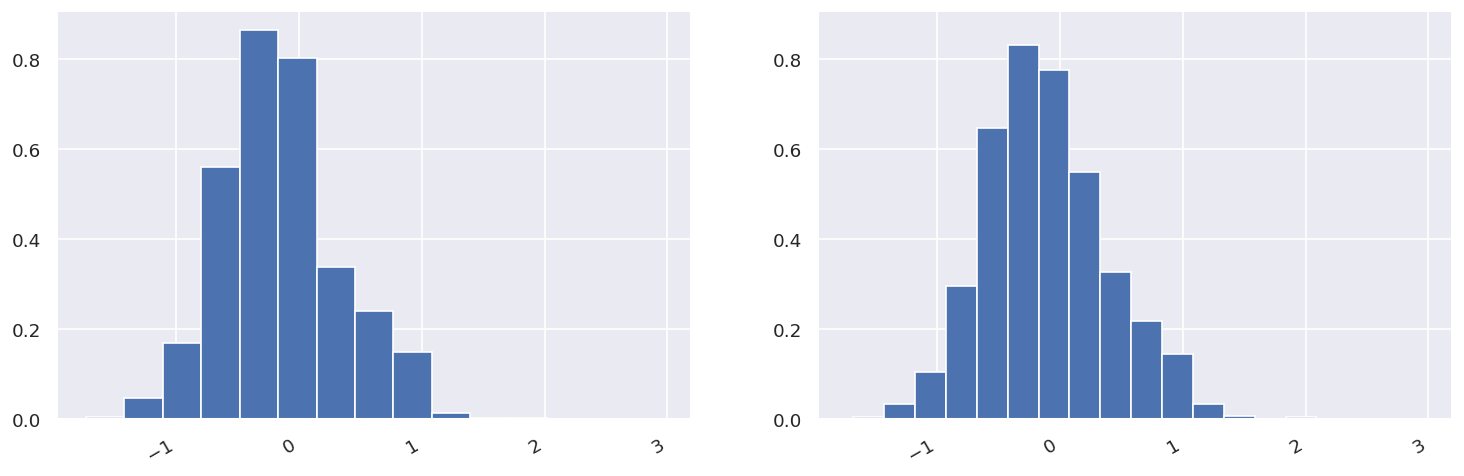

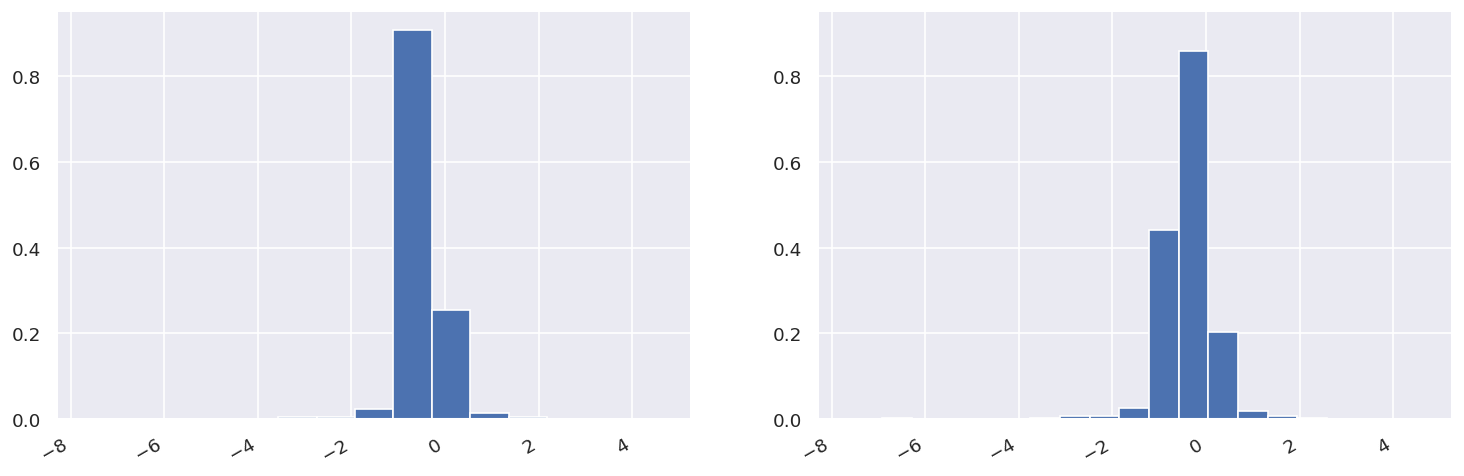

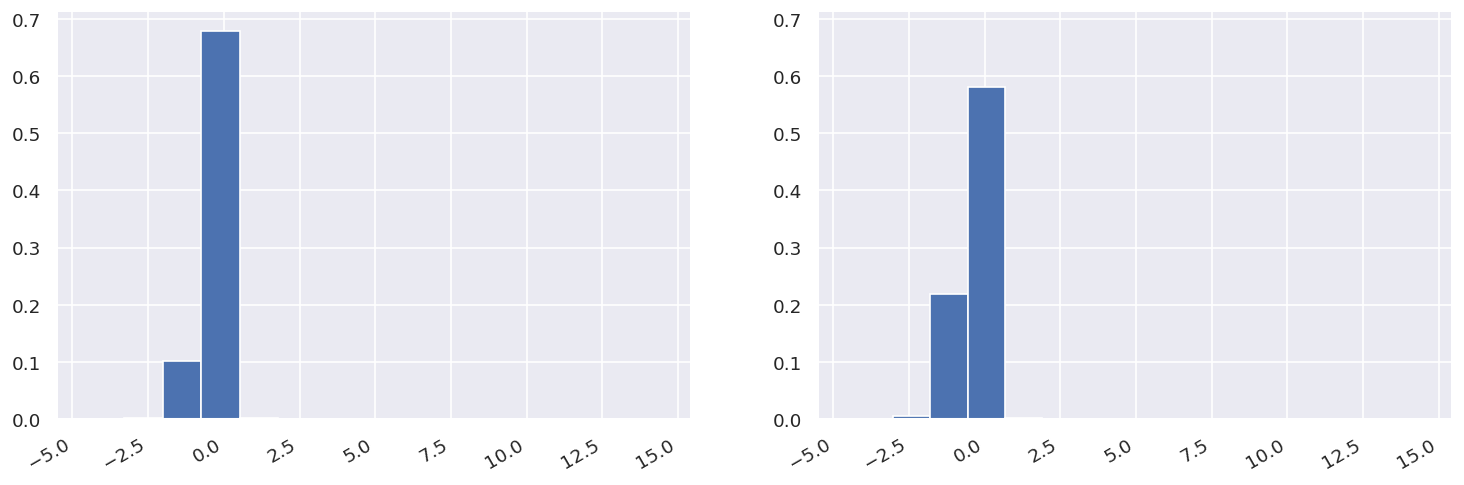

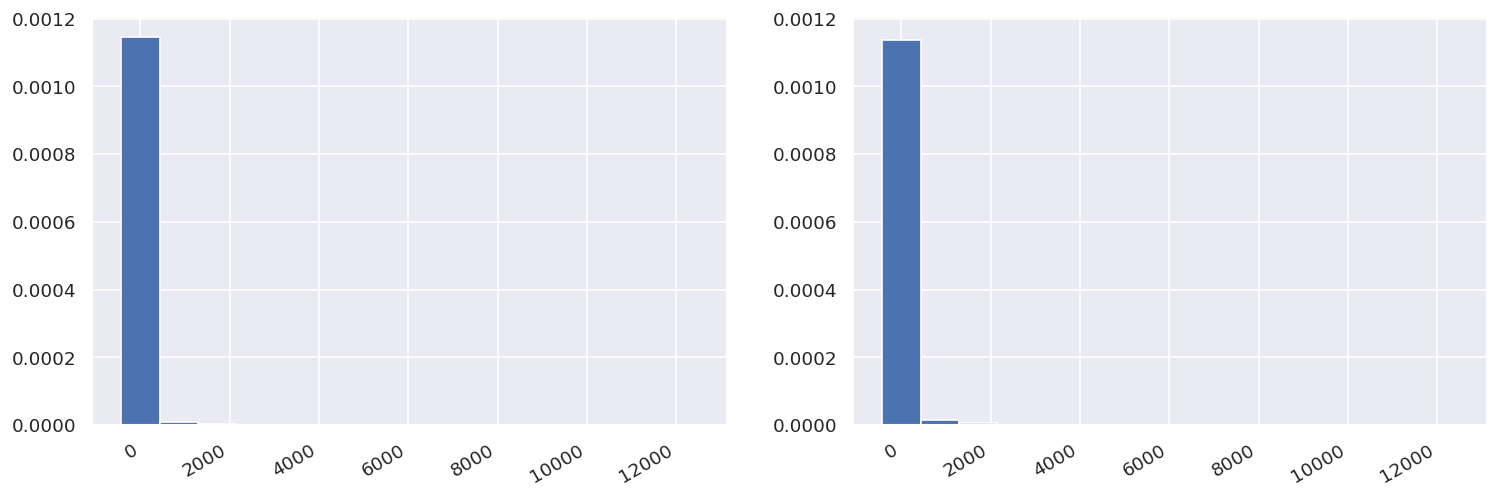

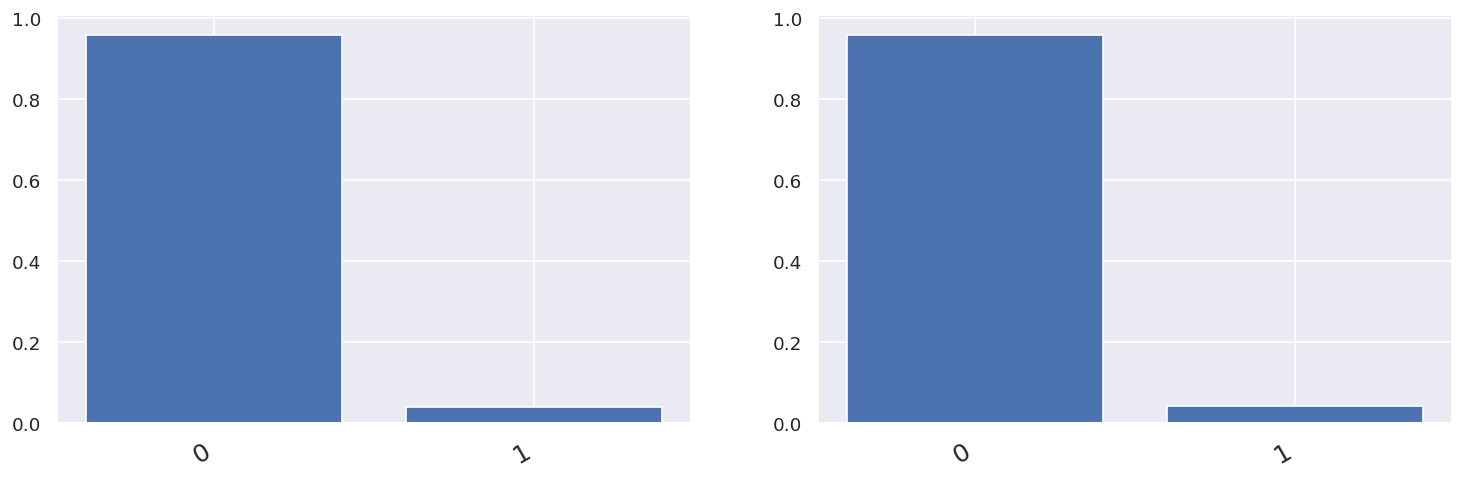

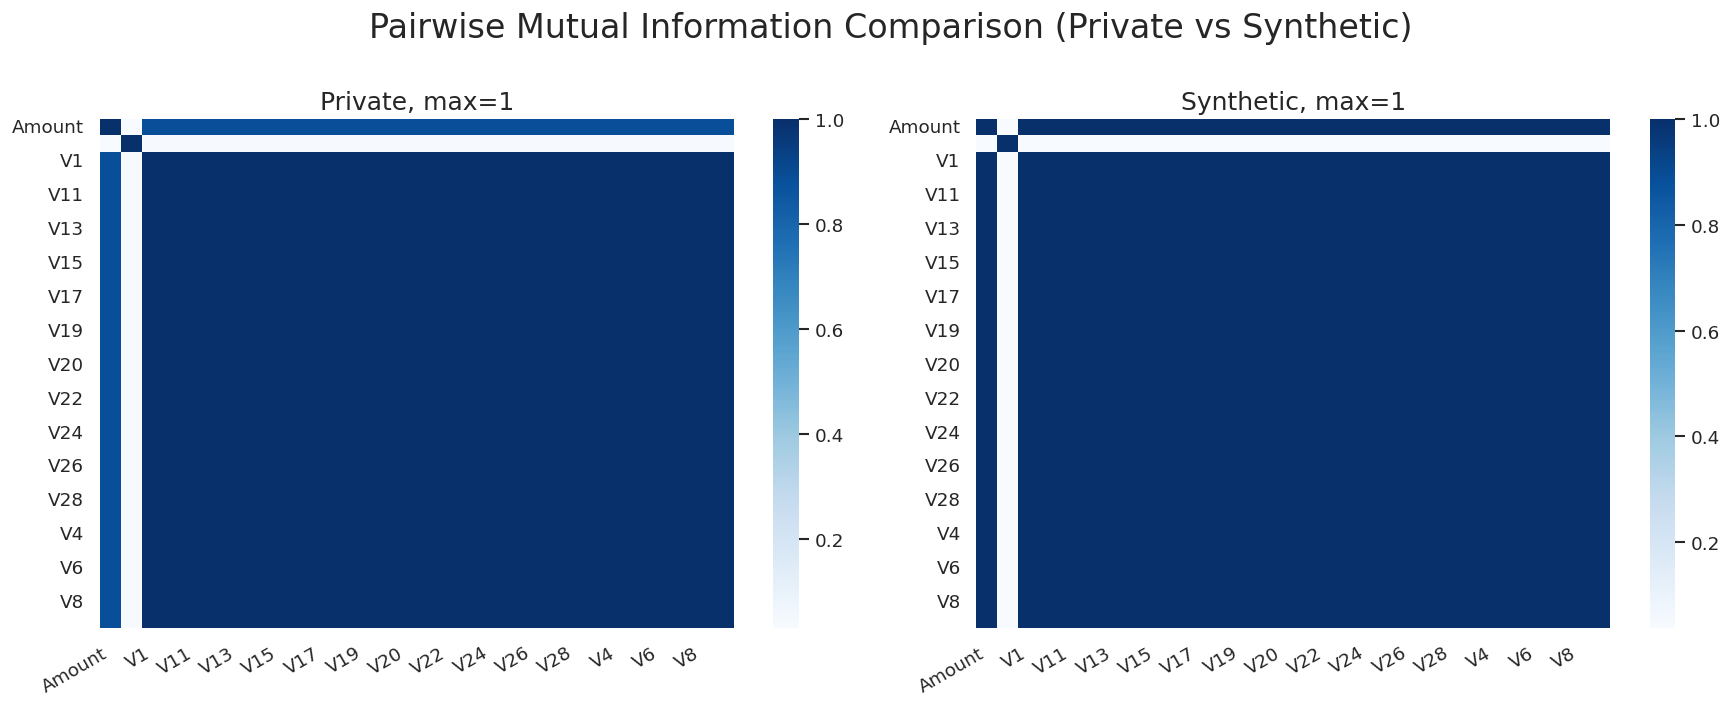

In [ ]:
#Implementation of DataSynthesizer(correlated with differential privacy 0) to Credit card dataset
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd

# input dataset
input_data = 'creditcard_sampledata_2.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = 'description_for_creditcard_dataset.json'
synthetic_data = 'synthetic_data_for_creditcard_dataset_correlated_mode.csv'
# An attribute is categorical if its domain size is less than this threshold.
threshold_value = 2

# specify categorical attributes
categorical_attributes = {'Class': True}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'V1': False}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 0

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 7300

describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)
display_bayesian_network(describer.bayesian_network)
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)
inspector.mutual_information_heatmap()

##Understanding SDV(GAUSSIAN) synthetic dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("model_Gaussian_for_creditcard.csv")

# Explore the features available in the dataframe
# df.head()
#print(df.info())


# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index)) 

0    7230
1      70
Name: Class, dtype: int64
0    0.990411
1    0.009589
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


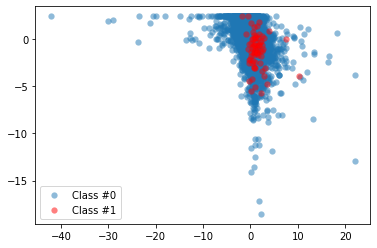

In [ ]:
# Define a function to turn dataframe to feature and response

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 1], X[y == 0, 0], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 1], X[y == 1, 0], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# Create X and y from our above defined function
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

##Random Forest model for synthetic(SDV Gaussian) dataset

In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the random forest model from sklearn
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)



RandomForestClassifier(random_state=5)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Random Forest:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Random Forest:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Random Forest:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Random Forest:\n",confusion_matrix(y_test, predicted))

Accuracy of Random Forest: 0.9904109589041096

The ROC curve of Random Forest: 0.9615469055303079

Classification report of Random Forest:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2169
         1.0       0.00      0.00      0.00        21

    accuracy                           0.99      2190
   macro avg       0.50      0.50      0.50      2190
weighted avg       0.98      0.99      0.99      2190


Confusion matrix of Random Forest:
 [[2169    0]
 [  21    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


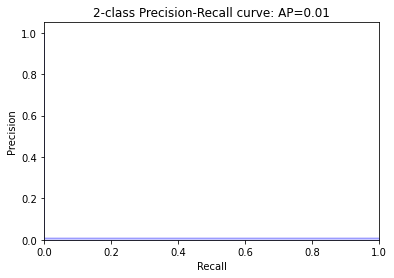

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Naive Bayes model for synthetic(SDV Gaussian) dataset

In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Naive Bayes model from sklearn
# Define the model as the Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to our training set
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Naive Bayes model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Naive Bayes:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Naive Bayes:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Naive Bayes:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Naive Bayes:\n",confusion_matrix(y_test, predicted))

Accuracy of Naive Bayes: 0.9506849315068493

The ROC curve of Naive Bayes: 0.9367713890535467

Classification report of Naive Bayes:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2169
         1.0       0.13      0.76      0.23        21

    accuracy                           0.95      2190
   macro avg       0.57      0.86      0.60      2190
weighted avg       0.99      0.95      0.97      2190


Confusion matrix of Naive Bayes:
 [[2066  103]
 [   5   16]]


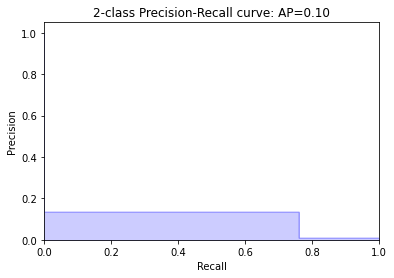

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Logistic Regression model for synthetic(SDV Gaussian) dataset


In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the LogisticRegression model from sklearn
# Define the model as the LogisticRegression
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()

# Fit the model to our training set
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our LogisticRegression model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Logistic Regression:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Logistic Regression:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Logistic Regression:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Logistic Regression:\n",confusion_matrix(y_test, predicted))

Accuracy of Logistic Regression: 0.9908675799086758

The ROC curve of Logistic Regression: 0.9757184570462578

Classification report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2169
         1.0       0.54      0.33      0.41        21

    accuracy                           0.99      2190
   macro avg       0.77      0.67      0.70      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Logistic Regression:
 [[2163    6]
 [  14    7]]


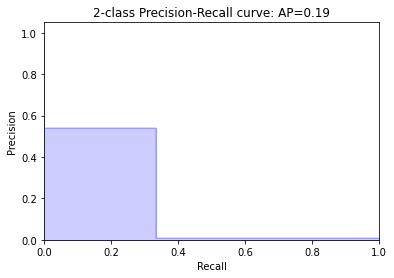

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##K Nearest Neighbor model for synthetic(SDV Gaussian) dataset





In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the K Nearest Neighbor model from sklearn
# Define the model as the K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 20)

# Fit the model to our training set
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our K Nearest Neighbor
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

print("Accuracy of K Nearest Neighbor:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of K Nearest Neighbor:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of K Nearest Neighbor:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of K Nearest Neighbor:\n",confusion_matrix(y_test, predicted))

Accuracy of K Nearest Neighbor: 0.9904109589041096

The ROC curve of K Nearest Neighbor: 0.8593712265911435

Classification report of K Nearest Neighbor:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2169
         1.0       0.00      0.00      0.00        21

    accuracy                           0.99      2190
   macro avg       0.50      0.50      0.50      2190
weighted avg       0.98      0.99      0.99      2190


Confusion matrix of K Nearest Neighbor:
 [[2169    0]
 [  21    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


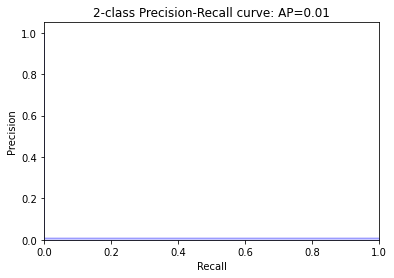

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Support Vector Machine model for synthetic(SDV Gaussian) dataset


In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Support Vector Machine model from sklearn
# Define the model as the Support Vector Machine
from sklearn.svm import SVC, LinearSVC
model = SVC(random_state=0)

# Fit the model to our training set
model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Support Vector Machine
predicted = model.predict(X_test)
# Predict probabilities
#probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print(accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print(roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print(classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print(confusion_matrix(y_test, predicted))

0.9904109589041096
0.8593712265911435
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2169
         1.0       0.00      0.00      0.00        21

    accuracy                           0.99      2190
   macro avg       0.50      0.50      0.50      2190
weighted avg       0.98      0.99      0.99      2190

[[2169    0]
 [  21    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


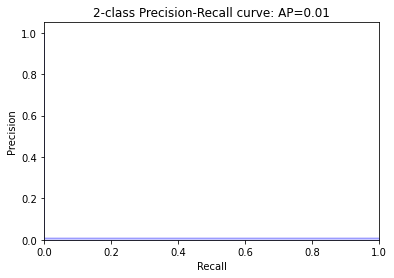

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Understanding SDV(TVAE) synthetic dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("model_TVAE_for_creditcard.csv")

# Explore the features available in the dataframe
# df.head()
#print(df.info())


# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index)) 

0    7075
1     225
Name: Class, dtype: int64
0    0.969178
1    0.030822
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


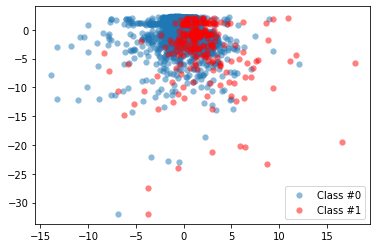

In [ ]:
# Define a function to turn dataframe to feature and response

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 1], X[y == 0, 0], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 1], X[y == 1, 0], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# Create X and y from our above defined function
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

##Random Forest model for synthetic(SDV TVAE) dataset



In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the random forest model from sklearn
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Random Forest:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Random Forest:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Random Forest:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Random Forest:\n",confusion_matrix(y_test, predicted))


Accuracy of Random Forest: 0.9876712328767123

The ROC curve of Random Forest: 0.9903993253781688

Classification report of Random Forest:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2127
         1.0       0.85      0.70      0.77        63

    accuracy                           0.99      2190
   macro avg       0.92      0.85      0.88      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Random Forest:
 [[2119    8]
 [  19   44]]


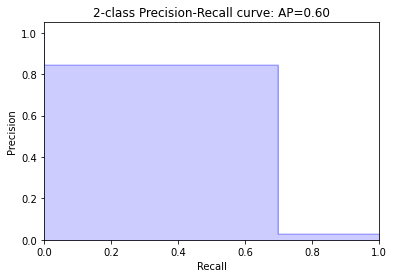

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

## Naive Bayes model for synthetic(SDV TVAE) dataset


In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Naive Bayes model from sklearn
# Define the model as the Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to our training set
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Naive Bayes model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Naive Bayes:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Naive Bayes:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Naive Bayes:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Naive Bayes:\n",confusion_matrix(y_test, predicted))

Accuracy of Naive Bayes: 0.9602739726027397

The ROC curve of Naive Bayes: 0.9736494503772359

Classification report of Naive Bayes:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2127
         1.0       0.41      0.84      0.55        63

    accuracy                           0.96      2190
   macro avg       0.70      0.90      0.76      2190
weighted avg       0.98      0.96      0.97      2190


Confusion matrix of Naive Bayes:
 [[2050   77]
 [  10   53]]


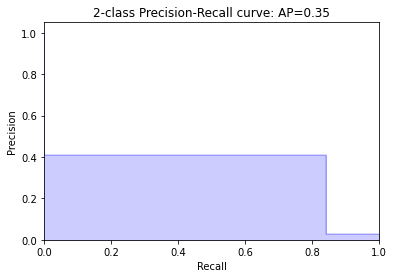

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Logistic Regression model for synthetic(SDV TVAE) dataset


In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the LogisticRegression model from sklearn
# Define the model as the LogisticRegression
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()

# Fit the model to our training set
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our LogisticRegression model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Logistic Regression:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Logistic Regression:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Logistic Regression:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Logistic Regression:\n",confusion_matrix(y_test, predicted))

Accuracy of Logistic Regression: 0.9867579908675799

The ROC curve of Logistic Regression: 0.9859105529063216

Classification report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2127
         1.0       0.83      0.68      0.75        63

    accuracy                           0.99      2190
   macro avg       0.91      0.84      0.87      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Logistic Regression:
 [[2118    9]
 [  20   43]]


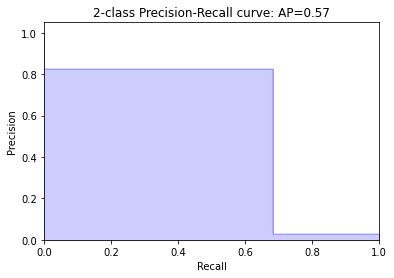

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##K Nearest Neighbor model for synthetic(SDV TVAE) dataset



In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the K Nearest Neighbor model from sklearn
# Define the model as the K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 20)

# Fit the model to our training set
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our K Nearest Neighbor
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of K Nearest Neighbor:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of K Nearest Neighbor:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of K Nearest Neighbor:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of K Nearest Neighbor:\n",confusion_matrix(y_test, predicted))

Accuracy of K Nearest Neighbor: 0.9844748858447488

The ROC curve of K Nearest Neighbor: 0.945888463518929

Classification report of K Nearest Neighbor:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2127
         1.0       0.87      0.54      0.67        63

    accuracy                           0.98      2190
   macro avg       0.93      0.77      0.83      2190
weighted avg       0.98      0.98      0.98      2190


Confusion matrix of K Nearest Neighbor:
 [[2122    5]
 [  29   34]]


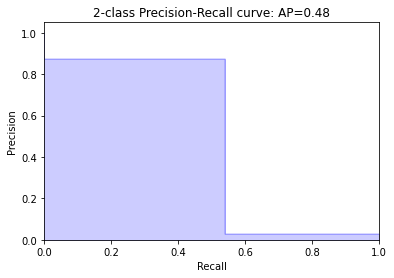

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Support Vector Machine model for synthetic(SDV TVAE) dataset



In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Support Vector Machine model from sklearn
# Define the model as the Support Vector Machine
from sklearn.svm import SVC, LinearSVC
model = SVC(random_state=0)

# Fit the model to our training set
model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Support Vector Machine
predicted = model.predict(X_test)
# Predict probabilities
#probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print(accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print(roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print(classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print(confusion_matrix(y_test, predicted))

0.9794520547945206
0.945888463518929
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2127
         1.0       0.78      0.40      0.53        63

    accuracy                           0.98      2190
   macro avg       0.88      0.70      0.76      2190
weighted avg       0.98      0.98      0.98      2190

[[2120    7]
 [  38   25]]


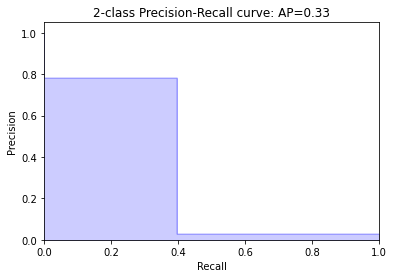

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Understanding DS correlated synthetic dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("synthetic_data_for_creditcard_dataset_correlated_mode.csv")

# Explore the features available in the dataframe
# df.head()
#print(df.info())


# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index)) 

0    6992
1     308
Name: Class, dtype: int64
0    0.957808
1    0.042192
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


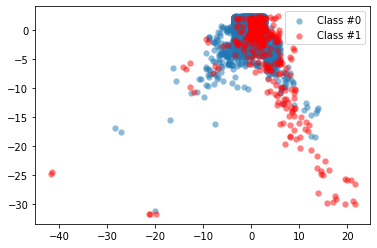

In [ ]:
# Define a function to turn dataframe to feature and response

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 1], X[y == 0, 0], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 1], X[y == 1, 0], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

# Create X and y from our above defined function
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

##Random Forest model for synthetic(DS correlated) dataset





In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the random forest model from sklearn
# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Random Forest:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Random Forest:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Random Forest:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Random Forest:\n",confusion_matrix(y_test, predicted))

Accuracy of Random Forest: 0.9904109589041096

The ROC curve of Random Forest: 0.9461934877203334

Classification report of Random Forest:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2086
         1.0       0.93      0.87      0.90       104

    accuracy                           0.99      2190
   macro avg       0.96      0.93      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Random Forest:
 [[2079    7]
 [  14   90]]


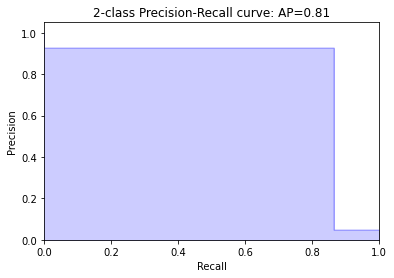

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Naive Bayes model for synthetic(DS correlated) dataset


In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Naive Bayes model from sklearn
# Define the model as the Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to our training set
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Naive Bayes model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Naive Bayes:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Naive Bayes:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Naive Bayes:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Naive Bayes:\n",confusion_matrix(y_test, predicted))

Accuracy of Naive Bayes: 0.9689497716894977

The ROC curve of Naive Bayes: 0.9426764510657127

Classification report of Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2086
         1.0       0.63      0.84      0.72       104

    accuracy                           0.97      2190
   macro avg       0.81      0.91      0.85      2190
weighted avg       0.97      0.97      0.97      2190


Confusion matrix of Naive Bayes:
 [[2035   51]
 [  17   87]]


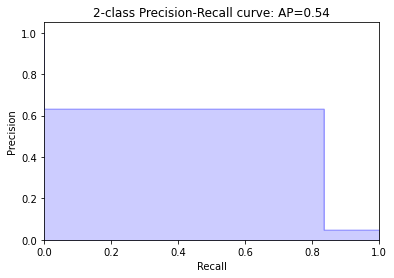

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Logistic Regression model for synthetic(DS correlated) dataset

In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the LogisticRegression model from sklearn
# Define the model as the LogisticRegression
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()

# Fit the model to our training set
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Logistic Regression model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of Logistic Regression:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of Logistic Regression:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of Logistic Regression:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of Logistic Regression:\n",confusion_matrix(y_test, predicted))

Accuracy of Logistic Regression: 0.9872146118721461

The ROC curve of Logistic Regression: 0.9591968434250313

Classification report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2086
         1.0       0.93      0.79      0.85       104

    accuracy                           0.99      2190
   macro avg       0.96      0.89      0.92      2190
weighted avg       0.99      0.99      0.99      2190


Confusion matrix of Logistic Regression:
 [[2080    6]
 [  22   82]]


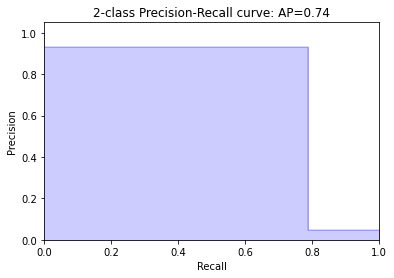

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##K Nearest Neighbor model for synthetic(DS correlated) dataset

In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the K Nearest Neighbor model from sklearn
# Define the model as the K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 20)

# Fit the model to our training set
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our K Nearest Neighbor
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print("Accuracy of K Nearest Neighbor:",accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print("\nThe ROC curve of K Nearest Neighbor:",roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print("\nClassification report of K Nearest Neighbor:\n",classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print("\nConfusion matrix of K Nearest Neighbor:\n",confusion_matrix(y_test, predicted))

0.9872146118721461
0.9324433955306438
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2086
         1.0       0.93      0.79      0.85       104

    accuracy                           0.99      2190
   macro avg       0.96      0.89      0.92      2190
weighted avg       0.99      0.99      0.99      2190

[[2080    6]
 [  22   82]]


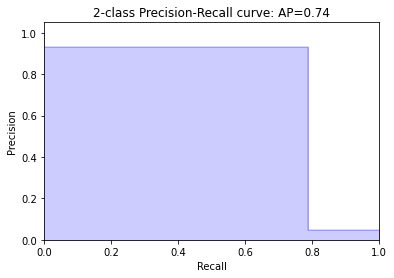

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

## Suppor Vector Machine for synthetic(DS correlated) dataset

In [ ]:
# Split your data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the Support Vector Machine model from sklearn
# Define the model as the Support Vector Machine
from sklearn.svm import SVC, LinearSVC
model = SVC(random_state=0)

# Fit the model to our training set
model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Print the accuracy performance metric
from sklearn.metrics import accuracy_score
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our Support Vector Machine
predicted = model.predict(X_test)
# Predict probabilities
#probs = model.predict_proba(X_test)

# Print Matric 1: accuracy
print(accuracy_score(y_test, predicted))
# Print Matric 2: the ROC curve
print(roc_auc_score(y_test, probs[:,1]))
# Print Matric 3: classification report 
print(classification_report(y_test, predicted))
# Print Matric 4: confusion matrix
print(confusion_matrix(y_test, predicted))

0.9881278538812786
0.9324433955306438
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2086
         1.0       0.90      0.85      0.87       104

    accuracy                           0.99      2190
   macro avg       0.95      0.92      0.93      2190
weighted avg       0.99      0.99      0.99      2190

[[2076   10]
 [  16   88]]


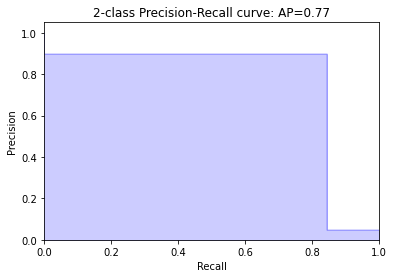

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()

plot_pr_curve(recall, precision, average_precision)

##Downloading the library of SDV and DS

In [ ]:
!pip install sdv
!pip install DataSynthesizer
import sdv

     |████████████████████████████████| 93 kB 1.6 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.7 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 11.2 MB 33.0 MB/s 
     |████████████████████████████████| 895 kB 37.6 MB/s 
     |████████████████████████████████| 280 kB 37.7 MB/s 
     |████████████████████████████████| 636 kB 46.4 MB/s 
     |████████████████████████████████| 2.5 MB 35.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uni